In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/MyDrive/MLproject

Mounted at /content/gdrive/
/content/gdrive/MyDrive/MLproject


In [2]:
pip install fastai

In [3]:
import csv
import fastai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from fastai.tabular import add_datepart
from sklearn.linear_model import LinearRegression


In [4]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
import math

--------
1. BHARTIARTL.csv
2. CIPLA.csv
3. DRREDDY's.csv
Input no of CSV file to get prediction: 1

---------------------------------------------
data of :  BHARTIARTL.csv
        Prev Close         Open  ...  Deliverable Volume  %Deliverble
count  4774.000000  4774.000000  ...        4.758000e+03  4758.000000
mean    379.688333   380.478456  ...        2.653730e+06     0.521711
std     207.237329   207.774041  ...        4.016530e+06     0.148377
min       0.000000    21.100000  ...        1.830100e+04     0.071900
25%     301.325000   302.000000  ...        8.125398e+05     0.417850
50%     348.800000   349.000000  ...        1.793994e+06     0.530000
75%     423.850000   425.000000  ...        3.254393e+06     0.628475
max    1125.650000  1133.900000  ...        1.229199e+08     0.999800

[8 rows x 12 columns]
No Missing values in the Close price coloumn


<Figure size 1440x576 with 0 Axes>

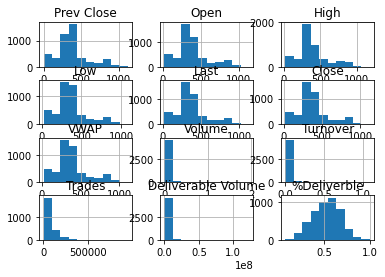

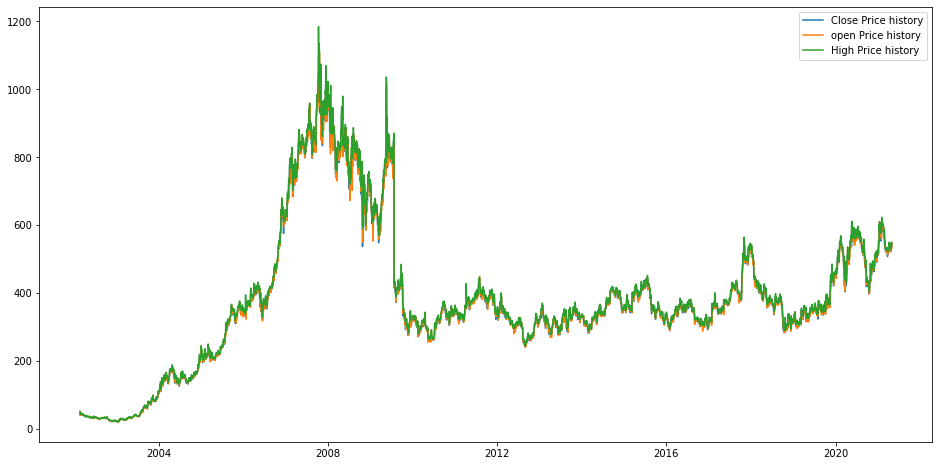

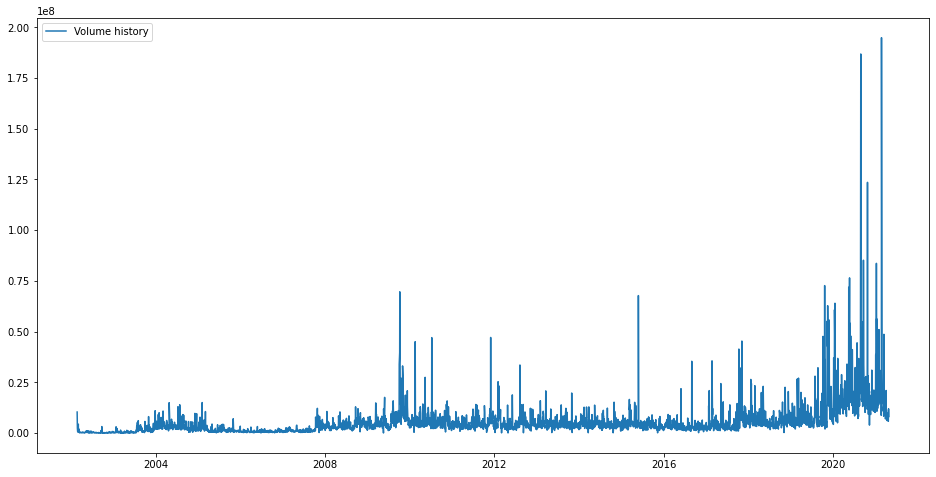

<Figure size 1152x648 with 0 Axes>

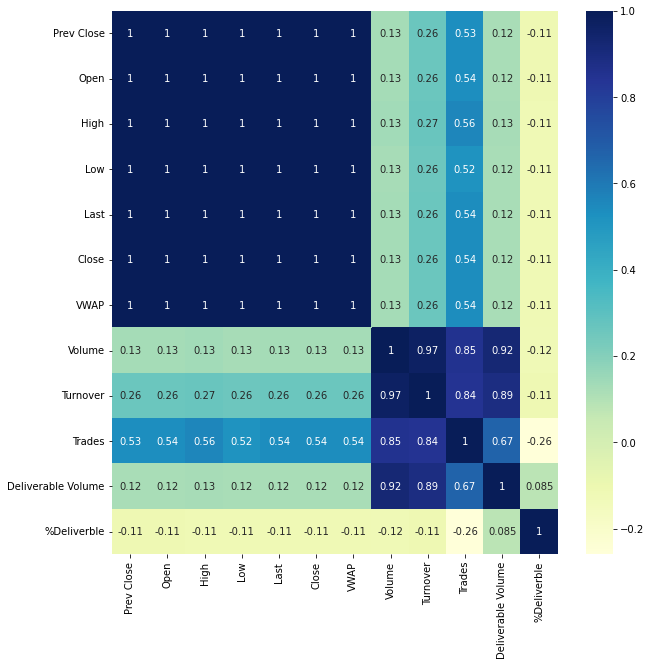

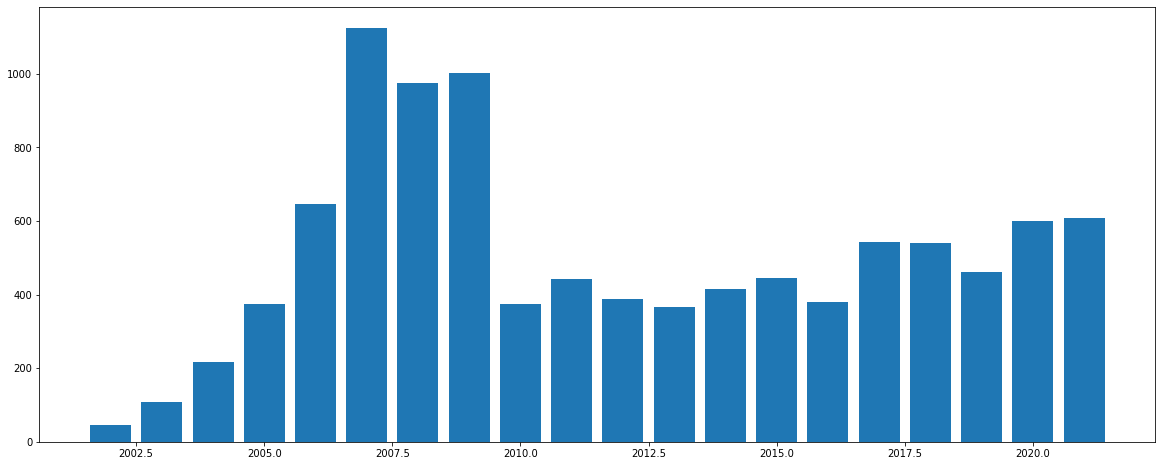

Intercept of the model [0.002583]
Slope of the model [0.107086]


KeyError: ignored

In [14]:
def alggo(data):
  print("\n---------------------------------------------\ndata of : ",data)
  #check close values is False
  df=pd.read_csv(data)
  df = pd.DataFrame(df)
  print(df.describe())
  if (df['Close'].isna().sum())!=1 and (df['High'].isna().sum())!=1:
    print("No Missing values in the Close price coloumn")
  
  #changing Date formate
  df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d') 
  df.index = df['Date']

  #sorting
  data = df.sort_index(ascending=True, axis=0)
  
  #creating a separate dataset
  new_data = pd.DataFrame(index=range(0,len(df)),columns=['Close','Open','High','Volume'])

  new_data['Close'] = df['Close'].values
  new_data['Open'] = df['Open'].values
  new_data['High'] = df['High'].values
  new_data['Volume'] = df['Volume'].values

  

  #standatization
  scaler = MinMaxScaler(feature_range=(0, 1))
  scal = scaler.fit_transform(new_data)
  

  #Visualization
  #histogram
  fig = plt.figure(figsize =(20,8))
  df.hist()
  fig.show()

  #data Close, High, Open
  plt.figure(figsize=(16,8))
  plt.plot(df['Date'],df['Close'], label='Close Price history')
  plt.plot(df['Date'],df['Open'], label='open Price history')
  plt.plot(df['Date'],df['High'], label='High Price history')
  plt.legend()
  plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(df['Date'],df['Volume'], label='Volume history')
  plt.legend()
  plt.show()

  #subplots
  plt.figure(figsize=(16,9))
  fig, ax = plt.subplots(figsize=(10,10))  
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

  # Horizontal Bar Plot
  df1 = df
  df1.index=df1['Date']
  df1['year'] = df1.index.year
  fig = plt.figure(figsize =(20,8))
  plt.bar(df1['year'],df1['Close'])
  plt.show()


  #standatization
  scaler = MinMaxScaler(feature_range=(0, 1))
  scal = scaler.fit_transform(new_data)
  
  new_data = pd.DataFrame(scal,index=range(0,len(df)),columns=new_data.columns)

  n = len(new_data)
  sev = int(0.66 * n)
  train = new_data[:sev]
  test = new_data[sev:]

  pred = ['Close']
  x_train = train.drop(pred, axis=1)
  y_train = train[pred]
  x_test = test.drop(pred, axis=1)
  y_test = test[pred]


  def theta_calc(x_train, y_train):
    #Initializing all variables
    n_data = x_train.shape[0]
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)
    #
    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)
    #
    return theta

  def predict_func(slope,intercept,x_test):
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
      tx = (slope * x_test[i]) + intercept
      pred.append(tx)
        
    return pred

  def mse_calc(prediction, y_test):
    #
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

  def rsq(prediction, y_test):
    #
    total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #
    r2 = 1 - (res_err / tot_err)
    return r2
  
  theta = theta_calc(x_train, y_train)
  intercept = theta[0]
  slope = theta[1]
  print('Intercept of the model', intercept)
  print('Slope of the model', slope)
  #Prediction calculation
  preds = predict_func(slope, intercept, x_test)

    #vizulization predictions Vs actual

  test['Predictions close'] = [x[0] for x in preds]
  

  test.index = new_data[sev:].index
  train.index = new_data[:sev].index

  

  x = np.array(y_test['Close'])
  y = np.array(test['Predictions close'])
  plt.scatter(x, y)
  plt.xlabel("Actual Price close")
  plt.ylabel("Predicted Price close")
  plt.show()

  fig = plt.figure(figsize =(20,8))
  
  plt.plot(test['Close'],label = 'actual')
  plt.plot(test['Predictions close'],label = 'prediction')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('prediction for close price')
  plt.legend()
  plt.show()


  print('R^2: ',model.score(x_test,y_test))
  print("Mean Absolute Error:", mean_absolute_error(y_test, preds))
  print("Coefficient of Determination:", r2_score(y_test, preds))
  print("MSE: ",metrics.mean_squared_error(y_test, preds))
  print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, preds)))


if __name__ == '__main__':
  filename=['BHARTIARTL.csv','CIPLA.csv','DRREDDY.csv']
  n = int(input("--------\n1. BHARTIARTL.csv\n2. CIPLA.csv\n3. DRREDDY's.csv\nInput no of CSV file to get prediction: "))
  alggo(filename[n-1])

In [ ]:
#implement linear regression
  model = LinearRegression()
  model.fit(x_train,y_train)

  #prediction
  preds = model.predict(x_test)
